<a href="https://colab.research.google.com/github/khagesh-bonde/C/blob/main/train_eda_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Dataset Loaded")


Dataset Loaded


In [3]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

print(df[['SibSp','Parch','FamilySize']].head())


   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [4]:
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0,12,20,40,60,100],
                        labels=['Child','Teen','Adult','MiddleAge','Senior'])

print(df[['Age','AgeGroup']].head())


    Age AgeGroup
0  22.0    Adult
1  38.0    Adult
2  26.0    Adult
3  35.0    Adult
4  35.0    Adult


In [5]:
survival_gender = df.groupby('Sex')['Survived'].mean()
print(survival_gender)


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [6]:
survival_class = df.groupby('Pclass')['Survived'].mean()
print(survival_class)


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [7]:
pivot_table = df.pivot_table(values='Survived',
                             index='Sex',
                             columns='Pclass',
                             aggfunc='mean')

print(pivot_table)


Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


In [8]:
cross_tab = pd.crosstab(df['Embarked'], df['Survived'])
print(cross_tab)


Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


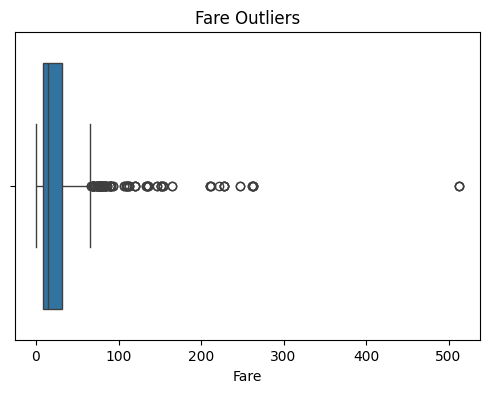

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")
plt.show()


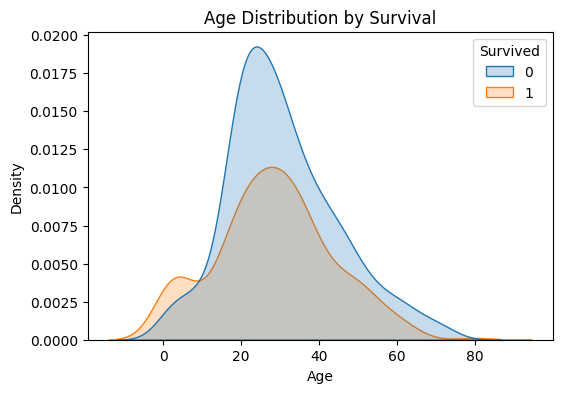

In [10]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title("Age Distribution by Survival")
plt.show()


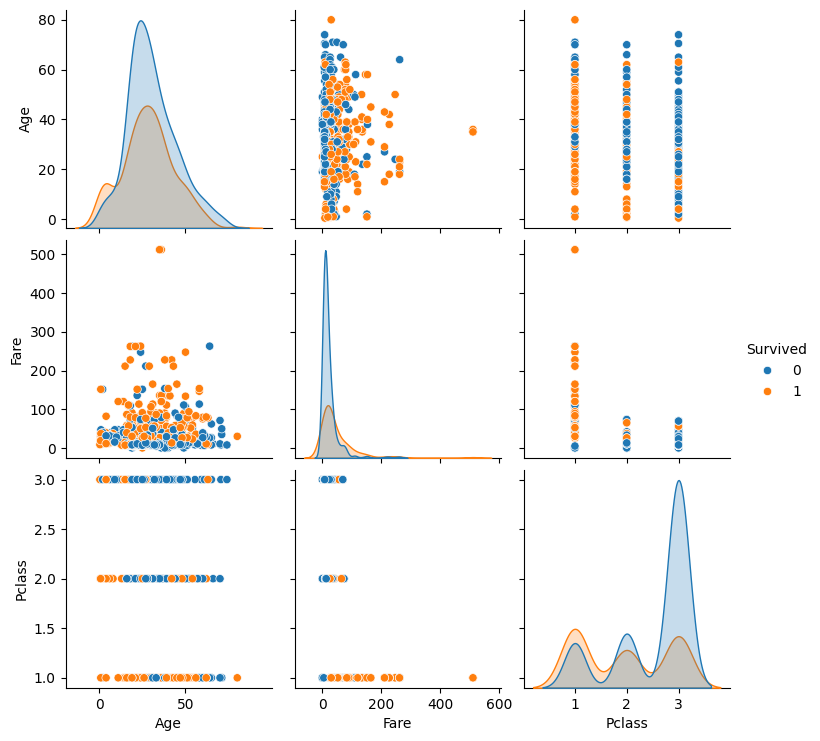

In [11]:
sns.pairplot(df[['Survived','Age','Fare','Pclass']], hue='Survived')
plt.show()


In [12]:
agegroup_survival = df.groupby('AgeGroup')['Survived'].mean()
print(agegroup_survival)


AgeGroup
Child        0.579710
Teen         0.381818
Adult        0.397403
MiddleAge    0.390625
Senior       0.227273
Name: Survived, dtype: float64


/tmp/ipython-input-2661948055.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_survival = df.groupby('AgeGroup')['Survived'].mean()


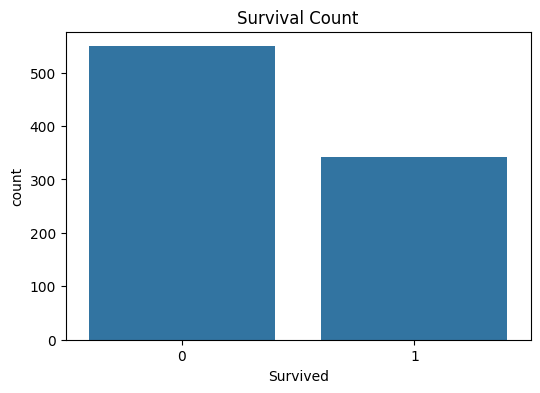

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


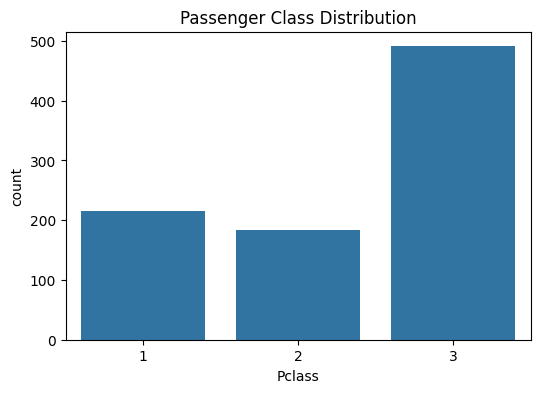

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()


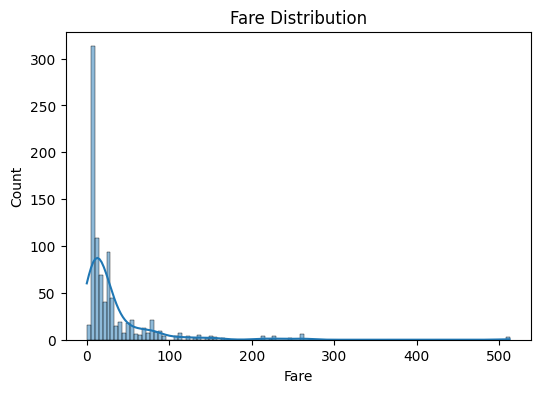

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df['Fare'], kde=True)
plt.title("Fare Distribution")
plt.show()

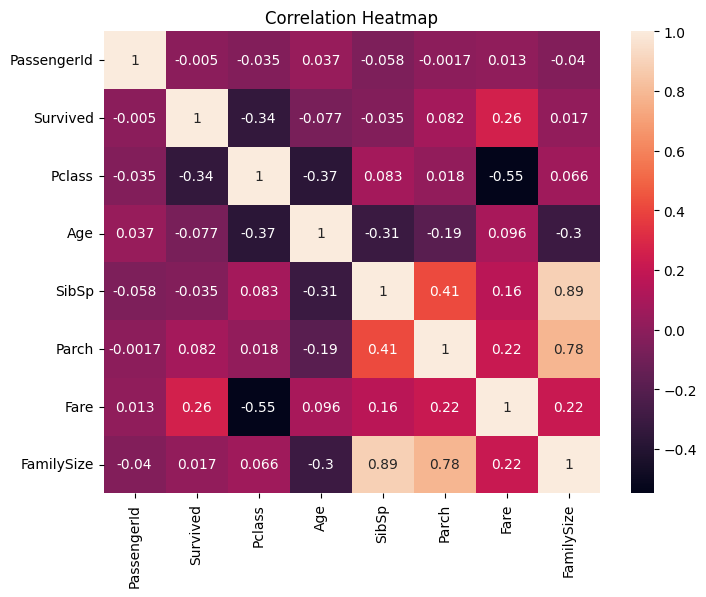

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()
